# Load Data

In [ ]:
import pandas as pd
%pip install gdown
import gdown, os

## Download Data dari GDRIVE
file_ids = [
    "1W3BRgpsFN3E2q1vJ5Wu3sb4XFWdiJfA5", ## RED WINE
    "1HYLKbHlKrLQdZx74zEyOMxvMgVDAk0G2" ## WHITE WINE
]

os.makedirs("DATA", exist_ok=True)

for file_id in file_ids:
    output_path = gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)
    os.rename(output_path, f"DATA/{output_path}")


  Using cached beautifulsoup4-4.13.5-py3-none-any.whl.metadata (3.8 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached charset_normalizer-3.4.3-cp312-cp312-win_amd64.whl.metadata (37 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
Using cached beautifulsoup4-4.13.5-py3-none-any.whl (105 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached certifi-2025.8.3-py3-none-any.whl (161 kB)
Using cached charset_normalizer-3.4.3-cp312-cp312-win_amd64.whl (107 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached soupsieve-2.8-py3-none-any.whl (36 kB)
Using cached typing_extensions-4.15.0-py3-none-an


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Downloading...
From: https://drive.google.com/uc?id=1W3BRgpsFN3E2q1vJ5Wu3sb4XFWdiJfA5
To: d:\AI_Journey\Machine_Learning_Journey\College_ML\winequality-red.csv
100%|██████████| 84.2k/84.2k [00:00<00:00, 2.38MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HYLKbHlKrLQdZx74zEyOMxvMgVDAk0G2
To: d:\AI_Journey\Machine_Learning_Journey\College_ML\winequality-white.csv
100%|██████████| 264k/264k [00:00<00:00, 1.52MB/s]


In [2]:
df_white = pd.read_csv("DATA/winequality-white.csv", delimiter=";")
df_red = pd.read_csv("DATA/winequality-red.csv", delimiter=";")

df = pd.concat([df_red, df_white], axis=0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [4]:
##CEK NUll
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
## Cek Distribusi Quality Wine
print("Wine Quality Distribution:")
print(df["quality"].value_counts().sort_index())

Wine Quality Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


Since the distribution is unbalanced, we map it into 2 or 3 categories

In [6]:
# def map_quality(q):
#   if q <= 4:
#     return 0 #Very Bad
#   elif q <=6:
#     return 1 #Average
#   else:
#     return 2 #Good

def map_quality(q):
  if q <= 6:
    return 0 #Below Average
  else:
    return 1 #Above Average


In [7]:
df["quality_label"] = df["quality"].apply(map_quality)

In [8]:
print(df["quality_label"].value_counts().sort_index())
df.drop("quality", axis=1, inplace=True)
df.info()

quality_label
0    5220
1    1277
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality_label         6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


Split training data, in this case we do a 80/20 split

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop("quality_label", axis=1)
y = df["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


Tried 3 NaiveBayes models to demonstrate how each model would perform on a continuous data

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, Binarizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# GaussianNB
pipe_g = Pipeline([
    ('scale', StandardScaler()),
    ('clf', GaussianNB())
])
pipe_g.fit(X_train, y_train)
g_pred = pipe_g.predict(X_test)

# MultinomialNB (scale to [0,1])
pipe_m = Pipeline([
    ('minmax', MinMaxScaler()),
    ('clf', MultinomialNB())
])
pipe_m.fit(X_train, y_train)
m_pred = pipe_m.predict(X_test)

# BernoulliNB (binarize features)
pipe_b = Pipeline([
    ('bin', Binarizer(threshold=X_train.mean().mean())),
    ('clf', BernoulliNB())
])
pipe_b.fit(X_train, y_train)
b_pred = pipe_b.predict(X_test)


from sklearn.linear_model import LogisticRegression


pipe_l = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression())
])
pipe_l.fit(X_train, y_train)
l_pred = pipe_l.predict(X_test)

In [11]:
import pandas as pd

results = [
    ("GaussianNB", accuracy_score(y_test, g_pred)),
    ("MultinomialNB", accuracy_score(y_test, m_pred)),
    ("BernoulliNB", accuracy_score(y_test, b_pred)),
    ("Logistic Regression", accuracy_score(y_test,l_pred))
]

summary = pd.DataFrame(results, columns=['Model', 'Accuracy']) \
            .sort_values('Accuracy', ascending=False).reset_index(drop=True)

print(summary)
print("\nGaussianNB Report:\n", classification_report(y_test, g_pred))


                 Model  Accuracy
0  Logistic Regression  0.824615
1        MultinomialNB  0.806154
2          BernoulliNB  0.805385
3           GaussianNB  0.760769

GaussianNB Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1048
           1       0.42      0.64      0.51       252

    accuracy                           0.76      1300
   macro avg       0.66      0.72      0.68      1300
weighted avg       0.81      0.76      0.78      1300



In [12]:
models = {
    "GaussianNB":   {"pipe": pipe_g, "y_pred": g_pred},
    "MultinomialNB":{"pipe": pipe_m, "y_pred": m_pred},
    "BernoulliNB":  {"pipe": pipe_b, "y_pred": b_pred},
    "LogisticRegression": {"pipe": pipe_l, "y_pred" : l_pred},
}

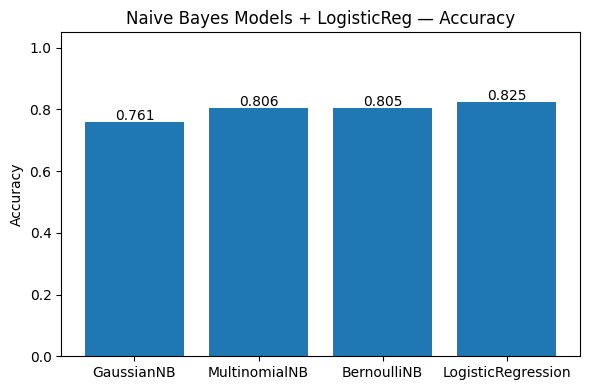

In [13]:
import matplotlib.pyplot as plt

accs = {name: accuracy_score(y_test, m["y_pred"]) for name, m in models.items()}

plt.figure(figsize=(6,4))
names, vals = zip(*accs.items())
bars = plt.bar(names, vals)
for b, v in zip(bars, vals):
    plt.text(b.get_x() + b.get_width()/2, v + 0.005, f"{v:.3f}", ha="center", fontsize=10)
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Naive Bayes Models + LogisticReg — Accuracy")
plt.tight_layout()
plt.show()

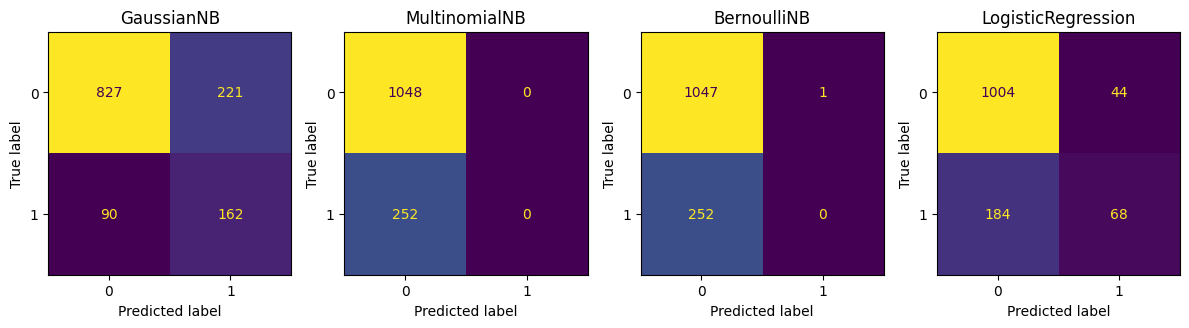

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3.6))
for ax, (name, m) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, m["y_pred"])
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()

**MultinomialNB and BernoulliNB** look better in terms of accuracy, but that’s just because 
1) The dataset is imbalanced and the scaling/binarization distorts continuous features. They default to predicting the majority class
2) MultinomialNB is designed for non-negative integer counts (like word frequencies in text), and BernoulliNB is designed for binary yes/no features (like presence of a word in an email).

<br>

**GaussianNB**, on the other hand, actually tries to separate the classes. Even if the accuracy is lower, it gives more meaningful predictions. And with techniques like resampling or feature engineering, we could improve its performance further.